In [165]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector#, plot_state_qsphere, plot_bloch_multivector, plot_bloch_vector

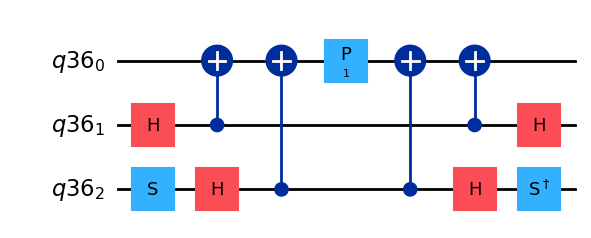

In [166]:
qx = QuantumRegister(3)

qc = QuantumCircuit(qx)
omega = 1
time = 1
qc.s(qx[2])
qc.h(qx[2])
qc.h(qx[1])
qc.cx(qx[1], qx[0])
qc.cx(qx[2], qx[0])
qc.p(omega*time, qx[0])
qc.cx(qx[2], qx[0])
qc.cx(qx[1], qx[0])
qc.h(qx[1])
qc.h(qx[2])
qc.sdg(qx[2])

qc.draw(output='mpl')

In [167]:
def rand(a=0, b=1):
    return a + (b-a)*np.random.random()

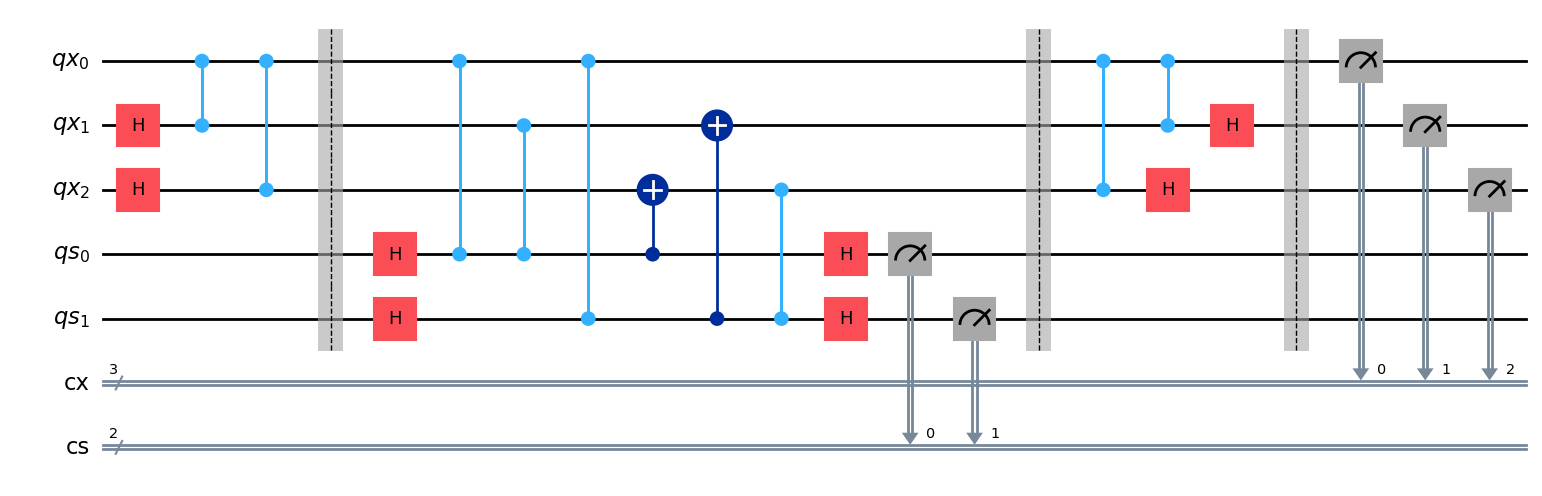

In [174]:
qx = QuantumRegister(3, 'qx')
qs = QuantumRegister(2, 'qs')
cx = ClassicalRegister(3, 'cx')
cs = ClassicalRegister(2, 'cs')
qc = QuantumCircuit(qx,qs,cx,cs)
theta = np.arccos(2*rand()-1)
phi = 2*np.pi*rand()
lamb = 0



# qc.u(theta, phi, lamb, qx[0])
# qc.z(qx[0])
# qc.z(qx[1])
# qc.x(qx[2])

# qc.z(qx[0])
# qc.x(qx[1])
# qc.z(qx[2])

qc.h([qx[1],qx[2]])

# a
# qc.cx(qx[1], qx[2])
# qc.cz(qx[1], qx[0])
# qc.cx(qx[0], qx[2])

# b
# qc.cz(qx[1], qx[2])
# qc.cx(qx[0], qx[1])
# qc.cx(qx[0], qx[2])

# c
# encoding
qc.cz(qx[0], qx[1])
qc.cz(qx[0], qx[2])
qc.barrier()

# syndrome measurement
qc.h(qs)
qc.cz(qs[0], qx[0])
qc.cz(qs[0], qx[1])
qc.cx(qs[0],qx[2] )
qc.cz(qs[1], qx[0])
qc.cx(qs[1],qx[1])
qc.cz(qx[2], qs[1])
qc.h(qs)
qc.measure(qs, cs)

# decoding
qc.barrier()
qc.cz(qx[0], qx[2])
qc.cz(qx[0], qx[1])
qc.h([qx[1],qx[2]])
qc.barrier()
# measure the qx register
qc.measure(qx, cx)

qc.draw(output='mpl')


In [175]:

# execute the quantum circuit
backend= Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
data = job.result().get_counts(qc)
print(data)

{'01 000': 68, '10 110': 65, '00 110': 64, '11 010': 58, '10 100': 71, '11 000': 63, '00 000': 61, '00 010': 63, '10 000': 66, '01 010': 58, '11 100': 76, '10 010': 59, '11 110': 66, '00 100': 59, '01 100': 63, '01 110': 64}


In [181]:
pow(3,4,16)

1